In [63]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/python-scientific-stack-3006561/main/Ch03/03_02/track.csv', parse_dates=['time'], index_col='time')
df.head()

,lat,lng,height
time,,,
2015-08-20 03:48:07.235,32.519585,35.015021,136.199997
2015-08-20 03:48:24.734,32.519606,35.014954,126.599998
2015-08-20 03:48:25.660,32.519612,35.014871,123.000000
2015-08-20 03:48:26.819,32.519654,35.014824,120.500000
2015-08-20 03:48:27.828,32.519689,35.014776,118.900002


Get the map of the average latitude and longitude values.

In [3]:
import folium

center = [df.lat.mean(), df.lng.mean()]
m = folium.Map(
    location=center,
    zoom_start=15
)

In [4]:
m

We can also save the view as html to view it later in our browser.

In [5]:
m.save('track.html')

We can add a marker with add_to attribute.

In [6]:
loc = tuple(df.iloc[100][['lat', 'lng']])
marker = folium.Marker(loc)
marker.add_to(m)

m

Create a circle marker with a popup.

In [7]:
m = folium.Map(location=center, zoom_start=15)

red_marker = folium.CircleMarker(loc, color='red', popup='Hi there!')
red_marker.add_to(m)

m

Add multiple markers showing the location for each minute.

In [8]:
def mark(row):
    loc = tuple(row[['lat', 'lng']])
    marker = folium.CircleMarker(location=loc, color='red', radius=5, popup=row.name.strftime('%H:%M'))
    marker.add_to(m)

In [9]:
m = folium.Map(location=center, zoom_start=15)

min_df = df.resample('min').mean()
min_df.apply(mark, axis=1)
   
m    #don't forget to click on the circles to see the time.

# Shapely

Create a point with Shapely

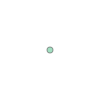

In [10]:
from shapely.geometry import Point

pt = Point(2,1)
pt

In [11]:
pt.x, pt.y

(2.0, 1.0)

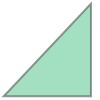

In [51]:
from shapely.geometry import Polygon

poly = Polygon([
    [0, 0],
    [33, 0],
    [33, 35.02],
])

poly

In [38]:
poly.area

1250.0

In [39]:
centroid = poly.centroid
centroid.x, centroid.y

(33.33333333333333, 16.666666666666664)

Does the polygon intersect the point?

In [40]:
poly.intersects(pt)

True

In [41]:
poly.intersects(Point(2,5))

False

Now, get the point of all lat and lng values per minute in the dataframe.

In [17]:
min_df = df.resample('min').mean()
min_df['point'] = min_df[['lat', 'lng']].apply(Point, axis=1)

In [18]:
min_df.sample(5)

,lat,lng,height,point
time,,,,
2015-08-20 03:54:00,32.513381,35.012358,98.233333,POINT (32.5133812 35.01235836666667)
2015-08-20 04:12:00,32.510804,35.020452,94.650000,POINT (32.5108035 35.02045192307692)
2015-08-20 04:10:00,32.511305,35.022528,100.628572,POINT (32.5113049047619 35.02252776190476)
2015-08-20 03:51:00,32.516264,35.013864,106.653334,POINT (32.5162645 35.01386383333333)
2015-08-20 03:56:00,32.512374,35.009665,82.606667,POINT (32.51237433333333 35.0096652)


Draw the polygon bounded by the points in the dataframe

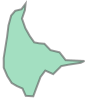

In [19]:
coord = [[item.x, item.y] for item in min_df.point ]

poly_map = Polygon(coord)
poly_map

In [20]:
poly_map.intersects(poly)

False

Find the points on the dataframe that intersects with the first triangle polygon.

In [56]:
min_df[min_df.point.apply(poly.intersects)]

,lat,lng,height,point
time,,,,


Find the coordinates of the exterior of the poly_map.

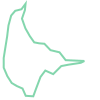

In [60]:
poly_map.exterior

In [61]:
poly_map.exterior.xy

(array('d', [32.51948457142857, 32.51897133333333, 32.517257826086954, 32.5162645, 32.51514063333333, 32.514047375000004, 32.5133812, 32.51279553571429, 32.512374333333334, 32.51132666666667, 32.51088076470588, 32.510076444444444, 32.509374550000004, 32.50876945833333, 32.508269954545455, 32.508267153846155, 32.508504280000004, 32.5087424, 32.50892967857143, 32.509305636363635, 32.50986557142857, 32.510734, 32.5113049047619, 32.51121220833333, 32.5108035, 32.511280166666666, 32.51188715, 32.51250347368421, 32.51318756521739, 32.51392023076923, 32.51476676923077, 32.516021464285714, 32.51687552631579, 32.51948457142857]),
 array('d', [35.01457057142857, 35.01431633333333, 35.0140552173913, 35.01386383333333, 35.012744399999995, 35.0132405625, 35.01235836666667, 35.01081096428571, 35.0096652, 35.00973111111111, 35.01074235294118, 35.01109733333333, 35.011514950000006, 35.01246870833334, 35.013637045454544, 35.01498384615385, 35.01648572, 35.01796292, 35.01950267857143, 35.02088495454546,

We have two arrays each for x and y coordinates each. Get x and y coordinates together for each point.

In [66]:
points = np.stack(poly_map.exterior.xy).T
points

array([[32.51948457, 35.01457057],
       [32.51897133, 35.01431633],
       [32.51725783, 35.01405522],
       [32.5162645 , 35.01386383],
       [32.51514063, 35.0127444 ],
       [32.51404738, 35.01324056],
       [32.5133812 , 35.01235837],
       [32.51279554, 35.01081096],
       [32.51237433, 35.0096652 ],
       [32.51132667, 35.00973111],
       [32.51088076, 35.01074235],
       [32.51007644, 35.01109733],
       [32.50937455, 35.01151495],
       [32.50876946, 35.01246871],
       [32.50826995, 35.01363705],
       [32.50826715, 35.01498385],
       [32.50850428, 35.01648572],
       [32.5087424 , 35.01796292],
       [32.50892968, 35.01950268],
       [32.50930564, 35.02088495],
       [32.50986557, 35.02153895],
       [32.510734  , 35.02175773],
       [32.5113049 , 35.02252776],
       [32.51121221, 35.02164008],
       [32.5108035 , 35.02045192],
       [32.51128017, 35.01910567],
       [32.51188715, 35.0180358 ],
       [32.51250347, 35.01715726],
       [32.51318757,

Show the exterior polygon on the map.

In [72]:
m = folium.Map(location=center, zoom_start=15)
m.add_child(folium.PolyLine(points, color='red'))
m

Add markers based on the height. If height is less than 100, add blue markers, otherwise red markers.

In [116]:
def track(row):
    loc = tuple(row[['lat', 'lng']])
    marker = folium.CircleMarker(location=loc,
                                color='blue' if row['height'] < 100 else 'red',
                                popup=row.name.strftime('%H:%m'))
    marker.add_to(m)

In [117]:
m = folium.Map(location=center, zoom_start=15)

min_df.apply(track, axis=1)

m